# Assignment 4.1: Create a Juypter Notebook to Connect to SAKILA Database and Visualize Data
Michelle Wang
ADS-507
Feb 2, 2026

In this assignment, you will use your knowledge of relational data to assist a company in creating its initial relational database by completing the following steps:

## Step 1, Create a Jupyter Notebook in VS Code
Question 1: Create a code block to import the necessary python packages:

In [ ]:
# import sys
# !{sys.executable} -m pip install pymysql


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [12]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt

## Step 2, Create a code block to connect to the SAKILA database

In [3]:
conn = mysql.connect(
    host="localhost",
    port=int(3306),
    user="root",
    passwd="3655505Myou",
    db="sakila"
)

print("Connected!")

Connected!


## Step 3, Create another code block to query the SAKILA database for all the table names:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

In [4]:
tableNames = pd.read_sql("SHOW TABLES;", conn)
tableNames

/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/3403082646.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tableNames = pd.read_sql("SHOW TABLES;", conn)


,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


## Step 4
Create another code block to query the SAKILA database for the following information:

### a. How many films of each rating are present in 'film' table?

In [5]:
# How many films of each rating are present in 'film' table?
q_a = """
SELECT rating, COUNT(*) AS film_count
FROM film
GROUP BY rating
ORDER BY film_count DESC;
"""
df_a = pd.read_sql(q_a, conn)
df_a

/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/368471353.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_a = pd.read_sql(q_a, conn)


,rating,film_count
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


### b. How many films(DISTINCT) of each rating are in stock?

In [6]:
# How many films(DISTINCT) of each rating are in stock?
q_b = """
SELECT f.rating, COUNT(DISTINCT i.film_id) as distinct_film_instock
FROM inventory i
JOIN film f ON i.film_id = f.film_id
GROUP BY f.rating
ORDER BY distinct_film_instock DESC;
"""
df_b = pd.read_sql(q_b, conn)
df_b




/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/143931052.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_b = pd.read_sql(q_b, conn)


,rating,distinct_film_instock
0,PG-13,213
1,NC-17,202
2,R,189
3,PG,183
4,G,171


### c. How many films are unavailable at the stores?

In [7]:
# How many films are unavailable at the stores?
q_c = """
SELECT s.store_id,
       COUNT(*) AS unavailable_films
FROM store s
JOIN film f
WHERE NOT EXISTS (
    SELECT 1
    FROM inventory i
    WHERE i.store_id = s.store_id
      AND i.film_id  = f.film_id
)
GROUP BY s.store_id
ORDER BY s.store_id;
"""
df_c = pd.read_sql(q_c, conn)
df_c


/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/1310118036.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(q_c, conn)


,store_id,unavailable_films
0,1,241
1,2,238


### d. In which cities are the stores located?

In [8]:
# In which cities are the stores located?
q_d = """
SELECT Distinct c.city
FROM store s
JOIN address a ON s.address_id = a.address_id
JOIN city c ON a.city_id = c.city_id

"""
df_d = pd.read_sql(q_d, conn)
df_d

/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/1225265931.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_d = pd.read_sql(q_d, conn)


,city
0,Lethbridge
1,Woodridge


### e. Which actor, amongst the actors who have worked in all 16 film categories, has performed in the most number of films?

In [9]:
# Which actor, amongst the actors who have worked in all 16 film categories, has performed in the most number of films?
q_e = """
SELECT a.first_name, a.last_name, Count(DISTINCT fc.film_id) as number_film, Count(DISTINCT fc.category_id) as number_category
FROM actor a 
JOIN film_actor fa ON a.actor_id = fa.actor_id
JOIN film_category fc ON fc.film_id = fa.film_id
GROUP BY fa.actor_id
ORDER BY number_film DESC
limit 1;
"""
df_e = pd.read_sql(q_e, conn)
df_e


/var/folders/k6/ty1dlmfs7hlb54_3j2ctvxs00000gn/T/ipykernel_22767/803926548.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_e = pd.read_sql(q_e, conn)


,first_name,last_name,number_film,number_category
0,GINA,DEGENERES,42,16


## Step 5 Visualize one result
Create a code block to visualize the data retrieved from one question above using matplotlib.pyplot. Note question a is recommended as there should only be 2 columns returned the rating and the film_count, and can be easily shown on a bar or pie chart.

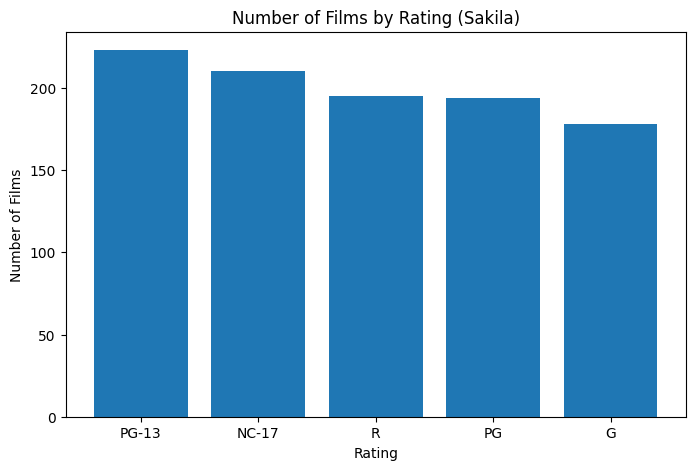

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df_a["rating"], df_a["film_count"])
plt.xlabel("Rating")
plt.ylabel("Number of Films")
plt.title("Number of Films by Rating (Sakila)")
plt.show()

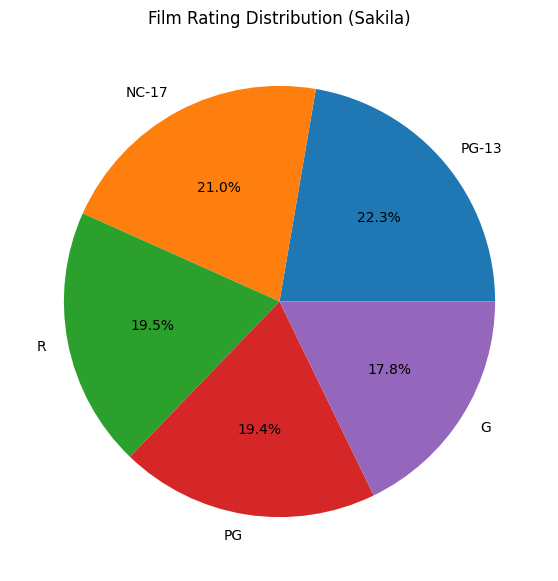

In [11]:
plt.figure(figsize=(7,7))
plt.pie(df_a["film_count"], labels=df_a["rating"], autopct="%1.1f%%")
plt.title("Film Rating Distribution (Sakila)")
plt.show()

## Step 6 Short description
Write a short description of your experience using Jupyter notebooks and pyplot.
Explain why you chose the chart that you provided for data visualization.

Answer: 
Experience using Jupyter + pyplot:
Using a Jupyter Notebook in VS Code made it easy to test the database connection, run SQL queries step-by-step, and immediately view results in DataFrames. I liked that I could iterate quickly—if a query looked wrong, I could adjust it and rerun the cell without restarting my workflow. For visualization, I used a bar chart because it clearly compares film counts across discrete rating categories and makes differences easy to interpret at a glance.